In [1]:
import BondGraphTools as bgt
from matplotlib.pyplot import plot

In [2]:
model = bgt.new()

C = bgt.new("C", value=1, name='C1') # 1 Farad
R = bgt.new("R", value=1, name='R1') # 1 Ohm
L = bgt.new("I", value=1, name='L1') # 1 Henry
KVL = bgt.new("1") # Common Voltage


model.add(R,L,C,KVL)
model.connect(R,KVL)
model.connect(L,KVL)
model.connect(C,KVL)

Se = bgt.new("Se", name='U') # Effort Source  
model.add(Se)
model.connect(Se, KVL)

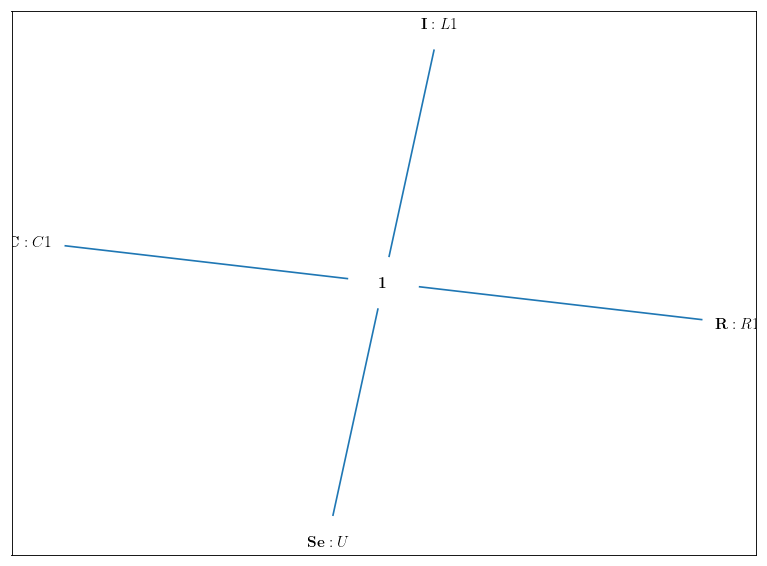

In [3]:
bgt.draw(model)

In [4]:
from BondGraphTools.sim_tools import to_julia_function_string

In [9]:
s, v = to_julia_function_string(model, {'u_0':'x_0*sin(t)'},in_place=True)

In [10]:
print(s)

function f(res, dX, X, p, t)
    u_0 = sin(t)*X[1]
    du_0 = sin(t)*dX[1] + cos(t)*X[1]
    res[1] = u_0 + X[1] + X[2] + dX[1]
    res[2] = -X[1] + dX[2]
end



In [7]:
from BondGraphTools.config import config
julia = config.julia
func = julia.eval(s)

TypeError: isinstance expected 2 arguments, got 1